# UCSD Confessions

In [1]:
# supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

## Loading Dataset

In [2]:
#import data loader modules
from code.load_data import load_data
from code.load_data import load_calendar
from code.load_data import load_corpus

# load data
df_main = load_data()
calendar = load_calendar()

# verify it loaded properly
df_main

,id,content,contact,tags,note,comment
timestamp,,,,,,
2018-10-22 16:02:47.236,6001,can y’all tag your friends with cute dogs that...,NaN,NaN,NaN,NaN
2018-10-22 16:33:13.204,6002,why do i get chills or an adrenaline rush when...,NaN,NaN,NaN,NaN
2018-10-22 17:02:03.596,6003,yo anyone else remember that confession where ...,NaN,NaN,NaN,NaN
2018-10-22 17:08:51.309,6004,I wish I had a sugar daddy,NaN,NaN,NaN,NaN
2018-10-22 17:35:54.654,6005,"Jaime, stop shitting into my shoes, I know tha...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-10-10 19:10:20.000,14438,To the person who was playing the trumpet outs...,NaN,wholesome,NaN,NaN
2019-10-11 15:58:00.000,14439,"Just out of curiosity, on a scale of one to te...",NaN,NaN,NaN,NaN
2019-10-11 17:03:50.000,14440,There is an abnormal amount of hot girls that ...,NaN,NaN,NaN,NaN


## Tag Analysis

In [3]:
from code.tag import preprocess_data as tag_preprocess
from code.tag import tag_plot
from code.tag import tag_num_plot

# compute tag information
df_tags=tag_preprocess(df_main.copy())

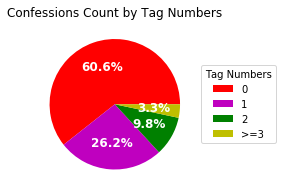

In [4]:
# plot tag number pie chart
tag_num_plot(df_tags)

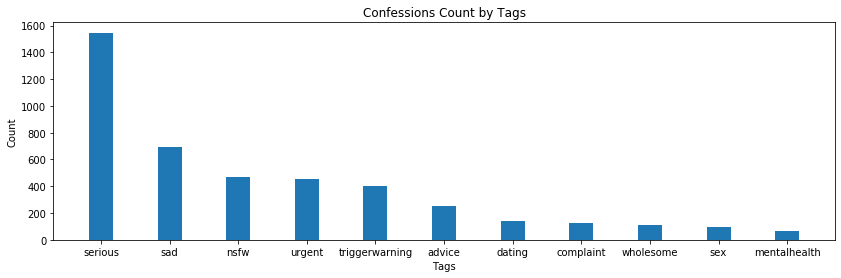

In [5]:
# plot tag type frequency
tag_plot(df_tags)

## Sentiment Analysis

In [8]:
from code.sentiment import pre_process as sentiment_preprocess
from code.sentiment import load_sentiment_dict
from code.sentiment import neg_pos_plot
from code.sentiment import sentiment_plot
from code.sentiment import weekday_diff_senti_plot

import pickle
try:
    # use a pickle cache to save time
    sentiments_of_word, df_sentiment = pickle.load( open( 'sentiments_cache.dat', "rb" ) )
except FileNotFoundError:
    # compute sentiment information
    sentiments_of_word = load_sentiment_dict()
    df_sentiment = sentiment_preprocess(sentiments_of_word, df_main.copy())
    pickle.dump( (sentiments_of_word, df_sentiment), open( 'sentiments_cache.dat', "wb" ) )

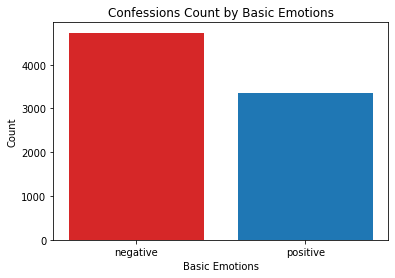

In [9]:
# plot negative vs positive confessions
neg_pos_plot(df_sentiment)

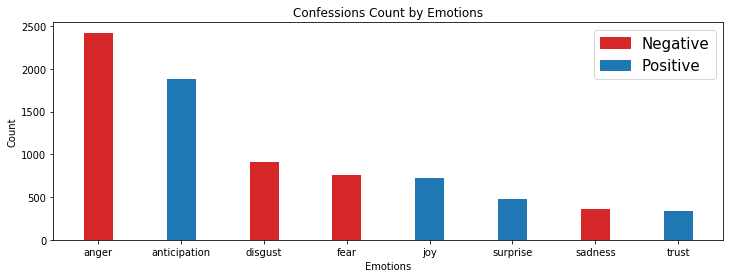

In [10]:
# plot frequency of various sentiments
sentiment_plot(df_sentiment)

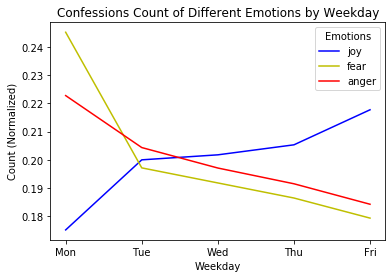

In [11]:
# plot progression of sentiments across weekdays
weekday_diff_senti_plot(df_sentiment)

## Finding Trends and Applications

In [26]:
from code.dist import plot_custom
from code.dist import submissions_over_time
from code.quarters import plot_weekday_dist
from code.quarters import plot_hourly_dist
from code.quarters import hist_hourly_quarter_edges
from code.quarters import hist_hourly_weekday_weekend
from code.quarters import keywords_over_quarters

df_trend = df_main.copy()

### General Submission History

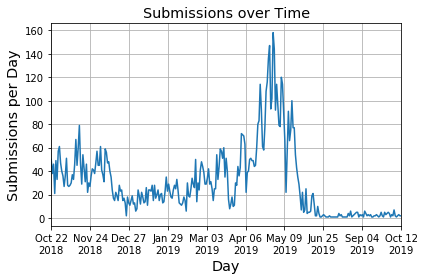

In [34]:
# plot total submissions over time
dist_total = submissions_over_time(df_trend, file='output/submission_history', show=True)

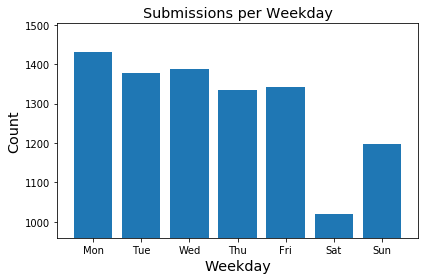

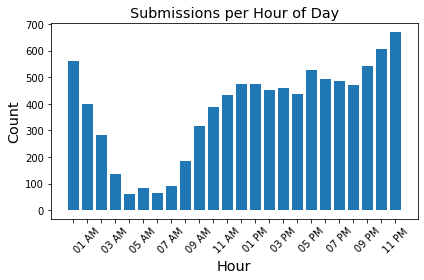

In [35]:
# plot total submissions by week and hour
dist_hourly = plot_weekday_dist(df_trend, show=False)
dist_weekly = plot_hourly_dist(df_trend, show=False)

### Sleep Patterns over Quarter System

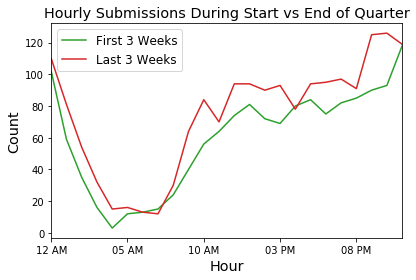

In [21]:
# plot hourly distribution for different parts of the quarter
hist_comb = hist_hourly_quarter_edges(df_trend, calendar, span=3)
plot_custom(hist_comb, 'line', 
            title='Hourly Submissions During Start vs End of Quarter', 
            file='output/hist_hourly_quarter_edges', xlabel='Hour', ylabel='Count',
            colors=['tab:green', 'tab:red'])

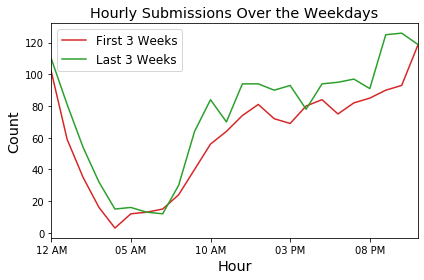

In [22]:
# plot hourly distribution for different parts of the week
plot_custom(hist_comb, 'line', 
            title='Hourly Submissions Over the Weekdays', 
            file='output/hist_hourly_weekday_weeked', xlabel='Hour', ylabel='Count',
            colors=['tab:red', 'tab:green'],
            show=False)

### Trending Topics over Quarter System

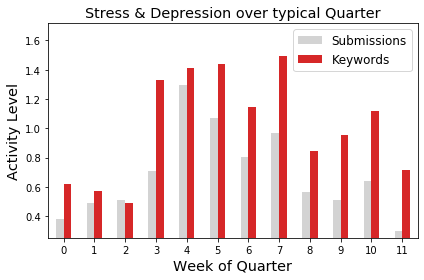

In [23]:
# individual corpus analysis plot
stress_words = load_corpus('data/stress_corpus.txt')
df_result = keywords_over_quarters(stress_words, calendar, df_trend, 
                title='Stress & Depression over typical Quarter', 
                file='output/plot_stress',
                colors=['lightgrey', 'tab:red', 'tab:green'],
                show=False)

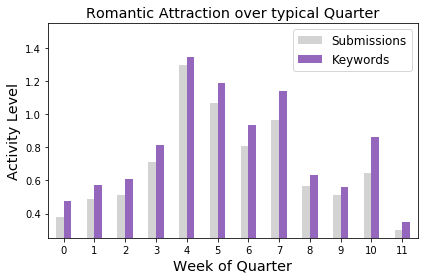

In [24]:
# individual corpus analysis plot
thirst_words = load_corpus('data/thirst_corpus.txt')
df_result = keywords_over_quarters(thirst_words, calendar, df_trend, 
                title='Romantic Attraction over typical Quarter', 
                file='output/plot_thirst',
                colors=['lightgrey', 'tab:purple'],
                show=False)

## Lexicon Analysis

### Load Modules and Data

In [10]:
from code.lexicon import prepare_confessions as lexicon_prep
from code.lexicon import plot_vad_weekday_scores
from code.lexicon import plot_nltk_vader_scores

In [6]:
# lexicon analysis was only completed on partial dataset
path = 'data/data1.csv'
df_lexicon = pd.read_csv(path)
df_lexicon = lexicon_prep(df_lexicon)

Total time: 0.9928905963897705 secs


### Visualize VAD Scores across Week

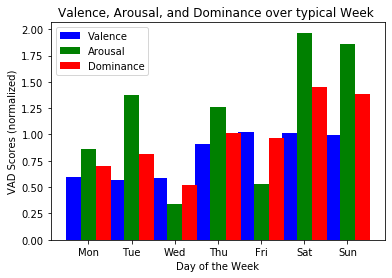

In [7]:
plot_vad_weekday_scores(df_lexicon)

## Visualize nltk Vader across Week

In [14]:
plot_nltk_vader_scores(df_lexicon)

FileNotFoundError: [Errno 2] No such file or directory: 'all_VAD_scores.pkl'